<a href="https://colab.research.google.com/github/vvbragin/netpyne2021/blob/main/NEURON_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generate the action potential with NEURON

In [2]:
!pip install neuron

     |████████████████████████████████| 12.6 MB 211 kB/s 


In [10]:
from neuron import h
from neuron.units import ms, mV, µm
import matplotlib.pyplot as plt
import plotly
h.load_file("stdrun.hoc")

1.0

In [29]:
def clearNeuronModel():
  h.ParallelContext.gid_clear()
  # unref all the NetCon
  # unref all the cell objects.

# This assumes the usual network style of model construction. For a single top level cell
# it usually suffices to
  # forall delete_section()

In [34]:
class Pyramidal:
  def __init__(self):
    print("Created pyramidal neuron")

    soma = h.Section(name="soma")
    soma.L = soma.diam = 10 * µm

    axon = h.Section(name="axon")
    axon.diam = 7.5 * µm
    axon.L = 100 * µm
    axon.nseg = 23

    dend1 = h.Section(name="dendrite1")
    dend1.L = 30  * µm
    dend1.diam = 7.5 * µm

    dend2 = h.Section(name="dendrite2")
    dend2.L = 30  * µm
    dend2.diam = 7.5 * µm

    dend3 = h.Section(name="dendrite3")
    dend3.L = 30  * µm
    dend3.diam = 7.5 * µm

    soma.connect(axon)
    soma.connect(dend1)
    soma.connect(dend2)
    soma.connect(dend3)

    self.soma = soma
    self.axon = axon
    self.dends = [dend1, dend2, dend3]

p = Pyramidal()

h.topology()
ps = h.PlotShape(True)
ps.plot(plotly).show()

Created pyramidal neuron

|-----------------------|       axon(0-1)
                         `|       soma(0-1)
|-----------------------|       axon(0-1)
|-----------------------|       axon(0-1)
|-|       dendrite1(0-1)
|-|       dendrite2(0-1)
|-|       dendrite3(0-1)
   `|       soma(0-1)
|-|       soma(0-1)
|-----------------------|       axon(0-1)
|-|       dendrite1(0-1)
|-|       dendrite2(0-1)
|-|       dendrite3(0-1)
   `|       soma(0-1)



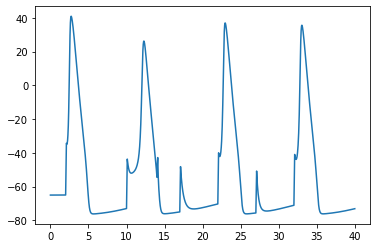

In [33]:


soma = h.Section(name="soma")
soma.L = soma.diam = 10 * µm
soma.insert(h.hh)
# h.hh.insert(soma)

iclamps = []
for i in [0, 8, 12, 15, 20, 25, 30]:
  ic = h.IClamp(soma(0.5))
  ic.delay = (2 + i) * ms
  ic.dur = 0.1 * ms
  ic.amp = 1
  iclamps.append(ic)

t = h.Vector().record(h._ref_t)
v = h.Vector().record(soma(0.5)._ref_v)

h.finitialize(-65 * mV)
h.continuerun(40 * ms)

plt.plot(t, v)
plt.show()


